In [1]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('tested.csv')
dataset.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [2]:

# Display basic information about the dataset
dataset_info = {
    "Head": dataset.head(),
    "Info": dataset.info(),
    "Describe": dataset.describe(include='all'),
    "Shape": dataset.shape
}

dataset_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              30000 non-null  int64  
 1   MONTH             30000 non-null  int64  
 2   SUPPLIER          29967 non-null  object 
 3   ITEM CODE         30000 non-null  object 
 4   ITEM DESCRIPTION  30000 non-null  object 
 5   ITEM TYPE         30000 non-null  object 
 6   RETAIL SALES      29999 non-null  float64
 7   RETAIL TRANSFERS  30000 non-null  float64
 8   WAREHOUSE SALES   30000 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.1+ MB


{'Head':    YEAR  MONTH                           SUPPLIER ITEM CODE  \
 0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
 1  2020      1                          PWSWN INC    100024   
 2  2020      1            RELIABLE CHURCHILL LLLP      1001   
 3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
 4  2020      1               DIONYSOS IMPORTS INC    100293   
 
                       ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
 0                  BOOTLEG RED - 750ML      WINE          0.00   
 1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
 2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
 3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
 4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   
 
    RETAIL TRANSFERS  WAREHOUSE SALES  
 0               0.0              2.0  
 1               1.0              4.0  
 2               0.0              1.0  
 3               0.0              1.0  
 4

In [3]:
# Check for remaining missing values
missing_values = dataset.isnull().sum()
print(missing_values)

YEAR                 0
MONTH                0
SUPPLIER            33
ITEM CODE            0
ITEM DESCRIPTION     0
ITEM TYPE            0
RETAIL SALES         1
RETAIL TRANSFERS     0
WAREHOUSE SALES      0
dtype: int64


In [4]:

#  Standardize column names (lowercase and replace spaces with underscores)
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')
dataset

,year,month,supplier,item_code,item_description,item_type,retail_sales,retail_transfers,warehouse_sales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29995,2020,3,"THE COUNTRY VINTNER, LLC DBA WINEBOW",352322,FORTALEZA ANEJO TEQUILA - 750ML,LIQUOR,0.33,0.0,0.0
29996,2020,3,OSLO ENTERPRISE,352324,DOMAINE BRICHOT BLANC - 750ML,WINE,0.00,0.0,0.0
29997,2020,3,OPICI FAMILY DISTRIBUTING OF MD,352354,LOTE 44 MALBEC - 750ML,WINE,0.00,0.0,6.0
29998,2020,3,CAMPARI AMERICA LLC,35238,SKYY VODKA - 1.75L,LIQUOR,329.04,302.0,0.0


In [5]:
# Display cleaning results
cleaning_results = {
    "Missing Values After Cleaning": missing_values,
    "Sample Data After Cleaning": dataset.head()
}

In [6]:
dataset = dataset.drop(['supplier','item_description','retail_transfers'], axis=1)
dataset


,year,month,item_code,item_type,retail_sales,warehouse_sales
0,2020,1,100009,WINE,0.00,2.0
1,2020,1,100024,WINE,0.00,4.0
2,2020,1,1001,BEER,0.00,1.0
3,2020,1,100145,WINE,0.00,1.0
4,2020,1,100293,WINE,0.82,0.0
...,...,...,...,...,...,...
29995,2020,3,352322,LIQUOR,0.33,0.0
29996,2020,3,352324,WINE,0.00,0.0
29997,2020,3,352354,WINE,0.00,6.0
29998,2020,3,35238,LIQUOR,329.04,0.0


In [7]:
cleaned_data = dataset.dropna(subset=['retail_sales'])
cleaned_data


,year,month,item_code,item_type,retail_sales,warehouse_sales
0,2020,1,100009,WINE,0.00,2.0
1,2020,1,100024,WINE,0.00,4.0
2,2020,1,1001,BEER,0.00,1.0
3,2020,1,100145,WINE,0.00,1.0
4,2020,1,100293,WINE,0.82,0.0
...,...,...,...,...,...,...
29995,2020,3,352322,LIQUOR,0.33,0.0
29996,2020,3,352324,WINE,0.00,0.0
29997,2020,3,352354,WINE,0.00,6.0
29998,2020,3,35238,LIQUOR,329.04,0.0


In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29999 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             29999 non-null  int64  
 1   month            29999 non-null  int64  
 2   item_code        29999 non-null  object 
 3   item_type        29999 non-null  object 
 4   retail_sales     29999 non-null  float64
 5   warehouse_sales  29999 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.6+ MB


# Python integration with SQL: Execute and process results programmatically


In [9]:
import sqlite3

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Load cleaned_data into SQLite
cleaned_data.to_sql('cleaned_data', conn, if_exists='replace', index=False)
print("Data loaded into SQLite successfully!")
cleaned_data

cursor.execute("SELECT * FROM cleaned_data LIMIT 5;")
print(cursor.fetchall())


Data loaded into SQLite successfully!
[(2020, 1, '100009', 'WINE', 0.0, 2.0), (2020, 1, '100024', 'WINE', 0.0, 4.0), (2020, 1, '1001', 'BEER', 0.0, 1.0), (2020, 1, '100145', 'WINE', 0.0, 1.0), (2020, 1, '100293', 'WINE', 0.82, 0.0)]


Perform SQL Queries

In [10]:
#Query top 5 items with the highest retail sales
querytopretailsalesitems = """
SELECT "item_code", "retail_sales"
FROM cleaned_data ORDER BY "retail_sales" DESC LIMIT 5;
"""
cursor.execute(querytopretailsalesitems)

# Fetch the data
results = cursor.fetchall()

# Print the results
print("Top 5 Items with the Highest Retail Sales:")
for row in results:
    print(f"Item code: {row[0]}, Retail Sales: {row[1]}")


Top 5 Items with the Highest Retail Sales:
Item code: 2, Retail Sales: 2739.0
Item code: 53929, Retail Sales: 1482.17
Item code: 23445, Retail Sales: 1174.0
Item code: 23445, Retail Sales: 992.0
Item code: 53929, Retail Sales: 848.82


In [11]:
#Aggregation: Calculate the total retail sales per item type
querytotalsalesperitemtype = """
SELECT item_type, SUM(retail_sales) as Total_Retail_Sales
FROM cleaned_data
GROUP BY item_type
ORDER BY Total_Retail_Sales DESC;
"""
cursor.execute(querytotalsalesperitemtype)

# Fetch the results
results = cursor.fetchall()

# Print the results
print("Total Retail Sales per Item Type:")
for row in results:
    print(f"Item Type: {row[0]}, Total Retail Sales: {row[1]:.2f}")


Total Retail Sales per Item Type:
Item Type: LIQUOR, Total Retail Sales: 81742.85
Item Type: WINE, Total Retail Sales: 59688.84
Item Type: BEER, Total Retail Sales: 59538.76
Item Type: NON-ALCOHOL, Total Retail Sales: 6824.62
Item Type: STR_SUPPLIES, Total Retail Sales: 345.60
Item Type: REF, Total Retail Sales: 46.27
Item Type: KEGS, Total Retail Sales: 0.00
Item Type: DUNNAGE, Total Retail Sales: 0.00


In [12]:
# Execute the query to calculate total sales by year and month
query_total_sales = """
SELECT
    YEAR,
    MONTH,
    SUM(retail_sales + warehouse_sales) AS Total_sales
FROM
    cleaned_data
GROUP BY
    year, month
ORDER BY
    year, month;
"""

# Execute the query and fetch the result
result = pd.read_sql_query(query_total_sales, conn)

# Print the result
print(result)


   year  month  Total_sales
0  2020      1    358433.49
1  2020      3    147829.12
2  2020      7    512633.38
3  2020      9     12221.88


In [13]:
# conn.close()


In [14]:

print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29999 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             29999 non-null  int64  
 1   month            29999 non-null  int64  
 2   item_code        29999 non-null  object 
 3   item_type        29999 non-null  object 
 4   retail_sales     29999 non-null  float64
 5   warehouse_sales  29999 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.6+ MB
None


In [15]:
print(cleaned_data.describe())

          year         month  retail_sales  warehouse_sales
count  29999.0  29999.000000  29999.000000     29999.000000
mean    2020.0      3.911364      6.939796        27.431945
std        0.0      2.836779     33.081054       272.170575
min     2020.0      1.000000     -0.420000     -3999.000000
25%     2020.0      1.000000      0.000000         0.000000
50%     2020.0      3.000000      0.160000         1.000000
75%     2020.0      7.000000      2.920000         6.000000
max     2020.0      9.000000   2739.000000     18317.000000


Numpy Usage

In [16]:
import numpy as np

# Extract numeric columns for statistical analysis
numeric_data = cleaned_data[["retail_sales", "warehouse_sales"]]



In [17]:
# Calculate basic statistics
mean_retail_sales = np.mean(numeric_data["retail_sales"])
print(f"Mean Retail Sales: {mean_retail_sales:.2f}")

mean_warehouse_sales = np.mean(numeric_data["warehouse_sales"])
print(f"Mean Warehouse Sales: {mean_warehouse_sales:.2f}")


Mean Retail Sales: 6.94
Mean Warehouse Sales: 27.43


In [18]:
median_retail_sales = np.median(numeric_data["retail_sales"])
print(f"Median Retail Sales: {median_retail_sales:.2f}")

median_warehouse_sales = np.median(numeric_data["warehouse_sales"])
print(f"Median Warehouse Sales: {median_warehouse_sales:.2f}")


Median Retail Sales: 0.16
Median Warehouse Sales: 1.00


In [19]:
std_dev_retail_sales = np.std(numeric_data["retail_sales"])
print(f"Standard Deviation (Retail Sales): {std_dev_retail_sales:.2f}")

std_dev_warehouse_sales = np.std(numeric_data["warehouse_sales"])
print(f"Standard Deviation (Warehouse Sales): {std_dev_warehouse_sales:.2f}")



Standard Deviation (Retail Sales): 33.08
Standard Deviation (Warehouse Sales): 272.17


In [20]:

total_retail_sales = np.sum(numeric_data["retail_sales"])
print(f"Total Retail Sales: {total_retail_sales:.2f}")

total_warehouse_sales = np.sum(numeric_data["warehouse_sales"])
print(f"Total Warehouse Sales: {total_warehouse_sales:.2f}")


Total Retail Sales: 208186.94
Total Warehouse Sales: 822930.93


In [21]:
# Percentiles (e.g., 25th, 50th, 75th percentiles)
percentiles_retail_sales = np.percentile(numeric_data["retail_sales"], [25, 50, 75])
print("\nPercentiles (Retail Sales):", percentiles_retail_sales)

percentiles_warehouse_sales = np.percentile(numeric_data["warehouse_sales"], [25, 50, 75])
print("Percentiles (Warehouse Sales):", percentiles_warehouse_sales)




Percentiles (Retail Sales): [0.   0.16 2.92]
Percentiles (Warehouse Sales): [0. 1. 6.]


In [22]:
# Min and Max values
min_retail_sales = np.min(numeric_data["retail_sales"])
print(f"Min Retail Sales: {min_retail_sales:.2f}")

max_retail_sales = np.max(numeric_data["retail_sales"])
print(f"Max Retail Sales: {max_retail_sales:.2f}")



Min Retail Sales: -0.42
Max Retail Sales: 2739.00


In [23]:
min_warehouse_sales = np.min(numeric_data["warehouse_sales"])
print(f"Min Warehouse Sales: {min_warehouse_sales:.2f}")

max_warehouse_sales = np.max(numeric_data["warehouse_sales"])
print(f"Max Warehouse Sales: {max_warehouse_sales:.2f}")

Min Warehouse Sales: -3999.00
Max Warehouse Sales: 18317.00


In [24]:
# Normalize Retail and Warehouse Sales to scale values between 0 and 1
normalized_retail_sales = (numeric_data["retail_sales"] - min_retail_sales) / (max_retail_sales - min_retail_sales)
print("\nSample Normalized Retail Sales (First 5):", normalized_retail_sales.head().values)

normalized_warehouse_sales = (numeric_data["warehouse_sales"] - min_warehouse_sales) / (max_warehouse_sales - min_warehouse_sales)
print("Sample Normalized Warehouse Sales (First 5):", normalized_warehouse_sales.head().values)


Sample Normalized Retail Sales (First 5): [0.00015332 0.00015332 0.00015332 0.00015332 0.00045265]
Sample Normalized Warehouse Sales (First 5): [0.1792884  0.17937802 0.17924359 0.17924359 0.17919878]


Oop File Handling Sales

In [25]:
import pandas as pd
import csv

# Base Class: Product
# Represents a product with essential details such as item code, type, retail sales, and warehouse sales
class Product:
    def __init__(self, item_code, item_type, retail_sales, warehouse_sales):
        self.item_code = item_code
        self.item_type = item_type
        self.retail_sales = retail_sales
        self.warehouse_sales = warehouse_sales

    def __repr__(self):
        return f"Product(Item Code: {self.item_code}, Type: {self.item_type}, Retail Sales: {self.retail_sales}, Warehouse Sales: {self.warehouse_sales})"


In [26]:
# Derived Class: SalesRecord
# Represents a sales record with year, month, and product details
class SalesRecord:
    def __init__(self, sale_id, year, month, product_id, product_type, cost_price, sale_price):
        self.sale_id = sale_id
        self.year = year
        self.month = month
        self.product_id = product_id
        self.product_type = product_type
        self.cost_price = cost_price
        self.sale_price = sale_price

    def __str__(self):
        return f"{self.sale_id}, {self.year}, {self.month}, {self.product_id}, {self.product_type}, {self.cost_price}, {self.sale_price}"


In [27]:
# SalesManager class to handle sales records
class SalesManager:
    def __init__(self):
        self.sales_records = []

    def add_sales_record(self, record: SalesRecord):
        self.sales_records.append(record)

    def display_all_sales(self):
        if not self.sales_records:
            print("No sales records to display.")
            return
        for record in self.sales_records:
            print(record)

    def save_sales_to_csv(self, filename):
        with open(filename, mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Sale ID', 'Year', 'Month', 'Product ID', 'Product Type', 'Cost Price', 'Sale Price'])
            for record in self.sales_records:
                writer.writerow([
                    record.sale_id, record.year, record.month,
                    record.product_id, record.product_type,
                    record.cost_price, record.sale_price
                ])
    # Load sales records from a CSV file
    def load_sales_from_csv(self, filename):
      self.sales_records = []
      with open(filename, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
          self.add_sales_record(
              SalesRecord(
                  row['Sale ID'], int(row['Year']), int(row['Month']),
                  row['Product ID'], row['Product Type'],
                  float(row['Cost Price']), float(row['Sale Price'])
                        )
                    )




In [28]:
#Display all sales records in the console
def display_all_sales(self):
  for record in self.sales_records:
    print(record)


In [29]:
# Main function
def main():
    # Create SalesManager instance
    manager = SalesManager()

    # Add sample sales records manually
    manager.add_sales_record(SalesRecord('S001', 2020, 1, '100009', 'WINE', 100.0, 200.0))
    manager.add_sales_record(SalesRecord('S002', 2021, 2, '100024', 'BEER', 150.0, 250.0))

    # Display all sales records
    print("\nAll Sales Records:")
    manager.display_all_sales()

    # Save records to a CSV file
    csv_file = 'sales_records.csv'
    manager.save_sales_to_csv(csv_file)
    print(f"\nSales records saved to {csv_file}")

    # Load sales records from the CSV file
    new_manager = SalesManager()
    new_manager.load_sales_from_csv(csv_file)
    print("\nSales records loaded from sales_records.csv:")
    new_manager.display_all_sales()


In [30]:
if __name__ == '__main__':
    main()



All Sales Records:
S001, 2020, 1, 100009, WINE, 100.0, 200.0
S002, 2021, 2, 100024, BEER, 150.0, 250.0

Sales records saved to sales_records.csv

Sales records loaded from sales_records.csv:
S001, 2020, 1, 100009, WINE, 100.0, 200.0
S002, 2021, 2, 100024, BEER, 150.0, 250.0


Data Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


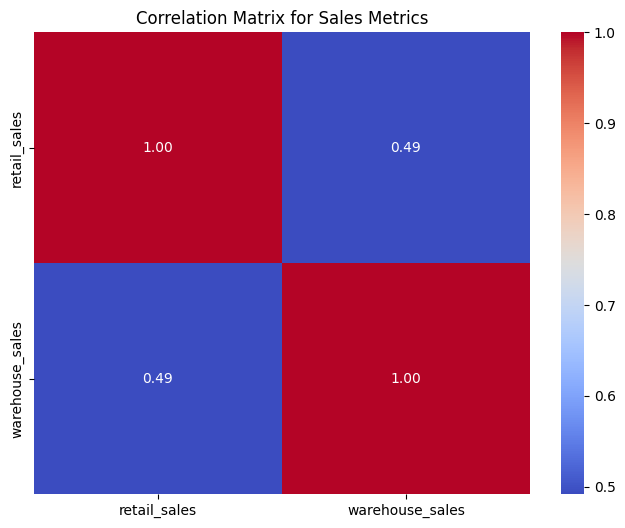

In [32]:
# Correlation between 2 numerical columns
correlation = cleaned_data[['retail_sales', 'warehouse_sales']].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Sales Metrics')
plt.show()


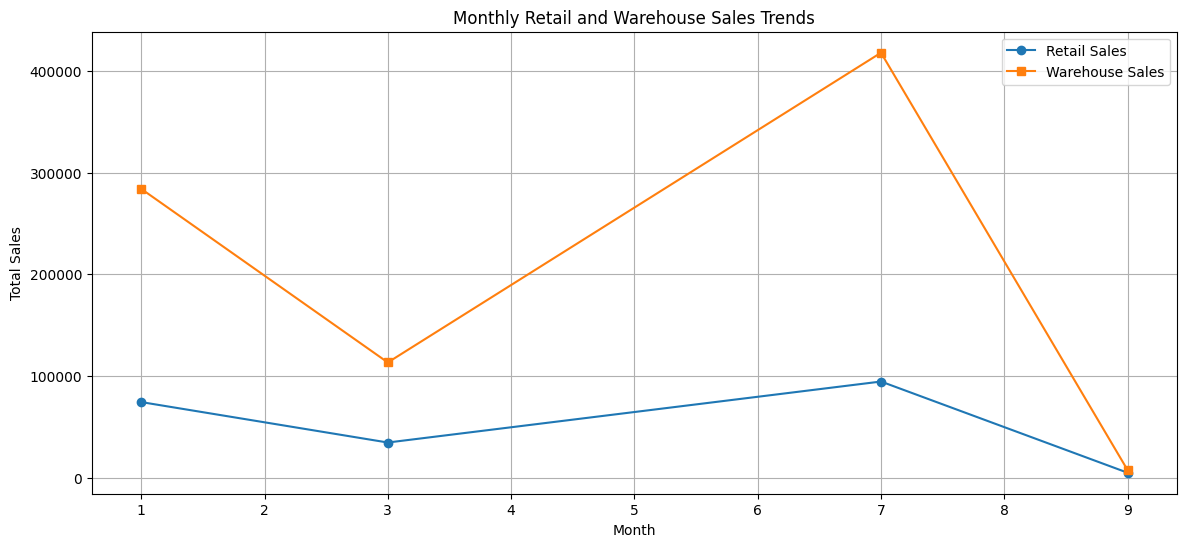

In [33]:
#Line Plot: Monthly Sales Trends
monthly_sales = cleaned_data.groupby(['year', 'month']).agg({
    'retail_sales': 'sum',
    'warehouse_sales': 'sum'
}).reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['month'], monthly_sales['retail_sales'], marker='o', label='Retail Sales')
plt.plot(monthly_sales['month'], monthly_sales['warehouse_sales'], marker='s', label='Warehouse Sales')

plt.title('Monthly Retail and Warehouse Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


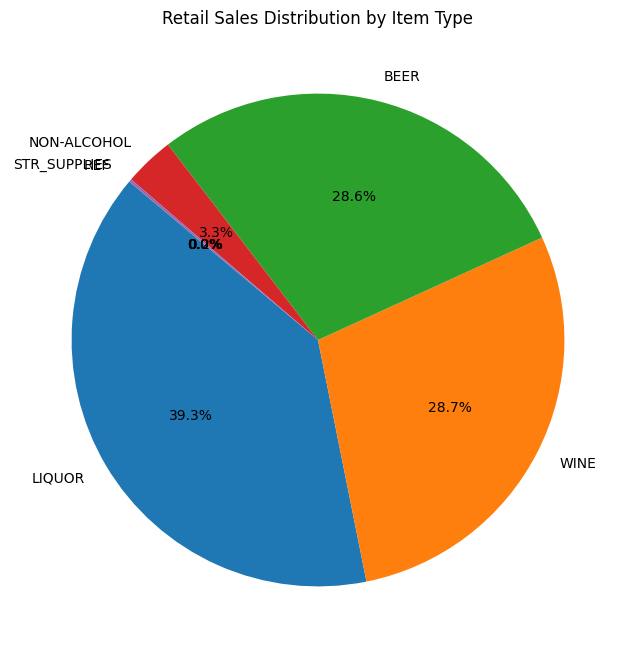

In [34]:
# Pie Chart: Distribution of Item Types by Retail Sales
item_sales = cleaned_data.groupby('item_type')['retail_sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
item_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, legend=False)

plt.title('Retail Sales Distribution by Item Type')
plt.ylabel('')  # Remove default ylabel
plt.show()


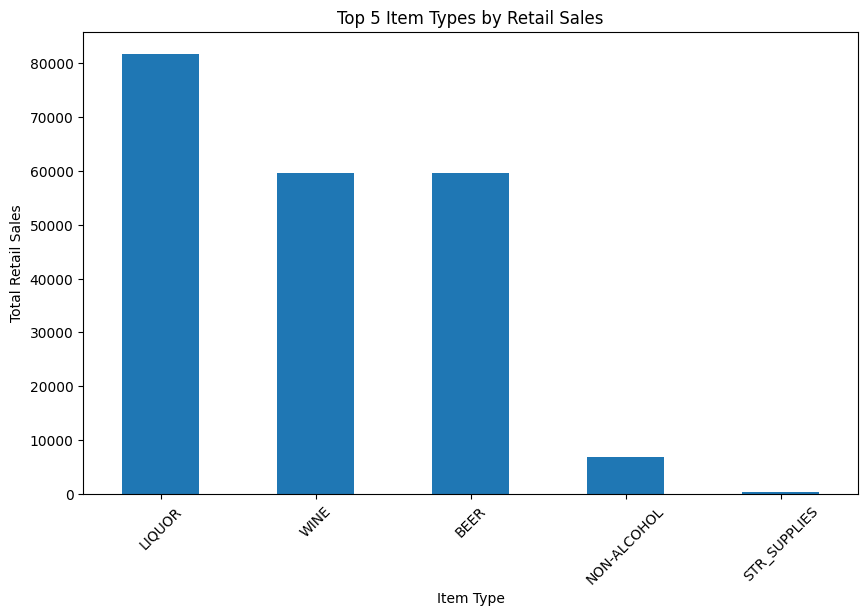

In [35]:
# Top 5 Item Types by Retail Sales
top_item_types = cleaned_data.groupby('item_type')['retail_sales'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
top_item_types.plot(kind='bar')

plt.title('Top 5 Item Types by Retail Sales')
plt.xlabel('Item Type')
plt.ylabel('Total Retail Sales')
plt.xticks(rotation=45)
plt.show()


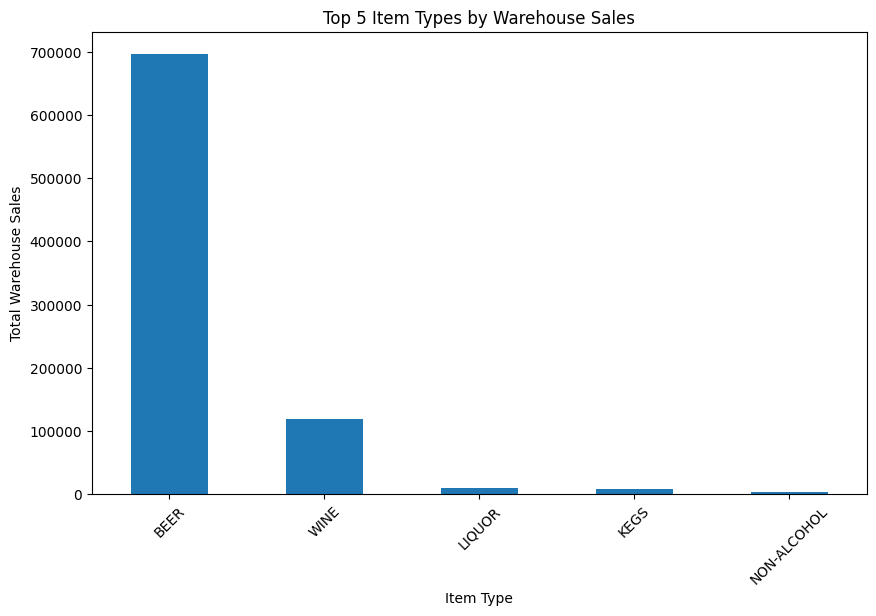

In [36]:
# Top 5 Item Types by Warehouse Sales
top_item_types = cleaned_data.groupby('item_type')['warehouse_sales'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
top_item_types.plot(kind='bar')

plt.title('Top 5 Item Types by Warehouse Sales')
plt.xlabel('Item Type')
plt.ylabel('Total Warehouse Sales')
plt.xticks(rotation=45)
plt.show()
